In [61]:
import tensorflow as tf
import pandas as pd

In [62]:
from google.colab import files
files.upload()

Saving INDU.csv to INDU (1).csv


{'INDU.csv': b'Date,Close\r\n24-06-20,25445.94\r\n23-06-20,26156.1\r\n22-06-20,26024.96\r\n19-06-20,25871.46\r\n18-06-20,26080.1\r\n17-06-20,26119.61\r\n16-06-20,26289.98\r\n15-06-20,25763.16\r\n12-06-20,25605.54\r\n11-06-20,25128.17\r\n10-06-20,26989.99\r\n09-06-20,27272.3\r\n08-06-20,27572.44\r\n05-06-20,27110.98\r\n04-06-20,26281.82\r\n03-06-20,26269.89\r\n02-06-20,25742.65\r\n01-06-20,25475.02\r\n29-05-20,25383.11\r\n28-05-20,25400.64\r\n27-05-20,25548.27\r\n26-05-20,24995.11\r\n22-05-20,24465.16\r\n21-05-20,24474.12\r\n20-05-20,24575.9\r\n19-05-20,24206.86\r\n18-05-20,24597.37\r\n15-05-20,23685.42\r\n14-05-20,23625.34\r\n13-05-20,23247.97\r\n12-05-20,23764.78\r\n11-05-20,24221.99\r\n08-05-20,24331.32\r\n07-05-20,23875.89\r\n06-05-20,23664.64\r\n05-05-20,23883.09\r\n04-05-20,23749.76\r\n01-05-20,23723.69\r\n30-04-20,24345.72\r\n29-04-20,24633.86\r\n28-04-20,24101.55\r\n27-04-20,24133.78\r\n24-04-20,23775.27\r\n23-04-20,23515.26\r\n22-04-20,23475.82\r\n21-04-20,23018.88\r\n20-04-20,

In [63]:
df = pd.read_csv('INDU.csv')

In [64]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index("Date", drop=False, inplace=True)

In [65]:
df  =df.iloc[::-1]

In [66]:
df.drop(labels=['Date'],axis =1, inplace=True)



In [67]:
df


,Close
Date,
2015-06-29,17596.35
2015-06-30,17619.51
2015-07-01,17757.91
2015-07-02,17730.11
2015-07-06,17683.58
...,...
2020-06-18,26080.10
2020-06-19,25871.46
2020-06-22,26024.96


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

In [72]:
series = np.array(df['Close'])
y_true = series[-1]
y_test = series[-11:-1]
series = series[:-11]

In [10]:
len(y_test)

30

In [73]:
def split_sequence(seq, n_steps):
    X, y= list(), list()
    for i in range(len(seq)):
        end_ix = i + n_steps
        
        if end_ix > len(seq)-1:
            break
        seq_x, seq_y = seq[i:end_ix], seq[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [74]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 25 00:01:34 2020

@author: ROHAN
"""

outputs = []
for n_steps in [10]:
  X, y = split_sequence(series, n_steps)
  # define generator
  n_input = n_steps
  '''
  generator = TimeseriesGenerator(series, series, length=n_input, batch_size=8)
  for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))
  '''   
  # define model
  
  model = Sequential([
  tf.keras.layers.Bidirectional(LSTM(64,activation='relu', return_sequences=True, input_shape=(n_input,1))),
  tf.keras.layers.Bidirectional(LSTM(32, activation='relu')),
  Dense(1)
  ])

  model.compile(optimizer='adam', loss='mean_squared_error')

  X = X.reshape((X.shape[0], X.shape[1], 1))

  model.fit(X,y, epochs=100, verbose=0)

  # make a one step prediction out of sample
  x_input = y_test.reshape((1, n_input,1))
  yhat = model.predict(x_input, verbose=0)
  outputs.append(yhat)


In [75]:
outputs

[array([[26015.984]], dtype=float32)]

In [76]:
y_true

25445.94

In [ ]:
x_input = y_test.reshape((1, n_input,1))
for i in range(30):
  yhat = model.predict(x_input, verbose=0)
  outputs.append(yhat)

In [46]:
y_test


array([23764.78, 23247.97, 23625.34, 23685.42, 24597.37, 24206.86,
       24575.9 , 24474.12, 24465.16, 24995.11, 25548.27, 25400.64,
       25383.11, 25475.02, 25742.65, 26269.89, 26281.82, 27110.98,
       27572.44, 27272.3 , 26989.99, 25128.17, 25605.54, 25763.16,
       26289.98, 26119.61, 26080.1 , 25871.46, 26024.96, 26156.1 ])

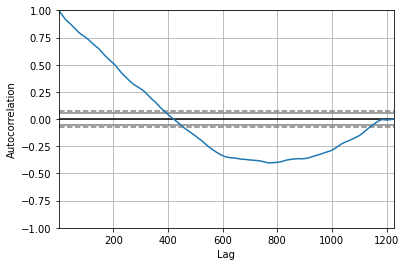

In [47]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)